# Analyse hyperOpal

In [8]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [13]:
with open("log/runnee.log", "r") as f:
    lines = f.readlines()
    lines = map(lambda l: " - ".join(l.split(" - ")[1:]).strip(), lines)
    params = map(lambda l: json.loads(l), lines)

    acc = map(lambda a: float(a["Accuracy"]), params)

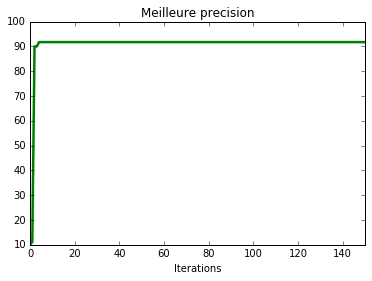

In [21]:
max_acc = [100 * max(acc[:i+1]) for i in xrange(len(acc))]

plt.plot(max_acc, color="g", linewidth=2.5)
plt.title("Meilleure precision")
plt.xlabel("Iterations")
# plt.plot(100*np.array(acc), color='gray')
plt.savefig("acc.eps", format="eps")
plt.xlim(0, 150)
plt.show()

0.9668

In [110]:
params_num = np.array(map(
        lambda p: [p["decay"], p["learning_rate"], p["moment"],
                   p["reg_l1"], p["reg_l2"], 
                   0 if p["n_couches"] <= 0 else p["noeuds"][0],
                   0 if p["n_couches"] <= 1 else p["noeuds"][1],
                   0 if p["n_couches"] <= 2 else p["noeuds"][2]
                  ]
        ,params
    ))
params_num_norm = np.transpose(np.copy(params_num))
for c in params_num_norm:
    c /= np.std(params_num_norm)
params_num_norm = np.transpose(params_num_norm)

In [106]:
X = PCA(n_components=2).fit_transform(params_num_norm)

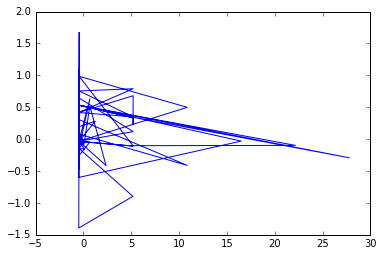

In [107]:
plt.plot(X[:,0], X[:,1])
plt.show()

In [129]:
def f(column):
    plt.plot(map(lambda p: p[column], params))
    plt.plot(np.ones(len(params)) * {"learning_rate":.001, "decay":1e-6, "moment":.01, "reg_l1":.0001, "reg_l2":.0001}[column])
    plt.show()

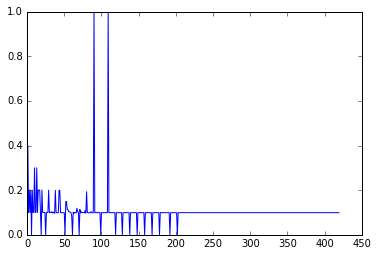

In [130]:
interact(f, column=("learning_rate", "decay", "moment", "reg_l1", "reg_l2"))